## Weight Initialization

In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# samples = np.empty((1000,256))
# for i in range(1000):
#     samples[i] = np.random.normal(0, 1, 256)
# samples = torch.from_numpy(samples)
# samples = samples.to(dtype = torch.double)


samples = torch.distributions.normal.Normal(0,1)
samples = samples.sample((1000,256))

class fully_connect(nn.Module):

    def __init__(self, init, relu = False):
        super(fully_connect,self).__init__()
        mu = 0
        if init == 0:
            sigma = 0.01
        elif init == 1:
            sigma = 1
        elif init == 2:
            #Xavier
            sigma = (2/(256+256))**0.5
        elif init == 3:
            #MSRA
            sigma = (2/256)**0.5
        
            
        self.fc1 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc1.weight, mean = mu, std = sigma)
        self.fc2 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc2.weight, mean = mu, std = sigma)
        self.fc3 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc3.weight, mean = mu, std = sigma)
        self.fc4 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc4.weight, mean = mu, std = sigma)
        self.fc5 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc5.weight, mean = mu, std = sigma)
        self.fc6 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc6.weight, mean = mu, std = sigma)
        self.fc7 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc7.weight, mean = mu, std = sigma)
        self.fc8 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc8.weight, mean = mu, std = sigma)
        self.fc9 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc9.weight, mean = mu, std = sigma)
        self.fc10 = nn.Linear(256,256,bias = False)
        torch.nn.init.normal_(self.fc10.weight, mean = mu, std = sigma)
        self.tanh = nn.Tanh()
        if relu == True:
            self.tanh = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        
        x = self.fc2(x)
        x = self.tanh(x)
        
        h = torch.tensor(x,requires_grad=False)
        h = np.asarray(h)
        h = h.flatten()
        plt.hist(h, bins='auto')
        plt.title('Layer 2 | std = '+str(np.std(h)))
        plt.show()
        
        x = self.fc3(x)
        x = self.tanh(x)
        
        x = self.fc4(x)
        x = self.tanh(x)
        
        h = torch.tensor(x,requires_grad=False)
        h = np.asarray(h)
        h = h.flatten()
        plt.hist(h, bins='auto')
        plt.title('Layer 4 | std = '+str(np.std(h)))
        plt.show()
        
        x = self.fc5(x)
        x = self.tanh(x)
        
        x = self.fc6(x)
        x = self.tanh(x)
        
        h = torch.tensor(x,requires_grad=False)
        h = np.asarray(h)
        h = h.flatten()
        plt.hist(h, bins='auto')
        plt.title('Layer 6 | std = '+str(np.std(h)))
        plt.show()
        
        x = self.fc7(x)
        x = self.tanh(x)
        
        x = self.fc8(x)
        x = self.tanh(x)
        
        h = torch.tensor(x,requires_grad=False)
        h = np.asarray(h)
        h = h.flatten()
        plt.hist(h, bins='auto')
        plt.title('Layer 8 | std = '+str(np.std(h)))
        plt.show()
        
        x = self.fc9(x)
        x = self.tanh(x)
        
        x = self.fc10(x)
        x = self.tanh(x)
        
        h = torch.tensor(x,requires_grad=False)
        h = np.asarray(h)
        h = h.flatten()
        plt.hist(h, bins='auto')
        plt.title('Layer 10 | std = '+str(np.std(h)))
        plt.show()
        
        return x

## Gaussian distribution of mean μ = 0 and std σ = 0.01 with tanh

From the following plots, we can see that: 1. All output are still rougly Guassion distributions with 0 means. 2. As the layers increases, the std $\sigma$ decreases dramatically, i.e., the distribution shrinks. It is expected, since most weights as less than 1, as the input data multiplies to these weights, the output will decreases and become closer to 0. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


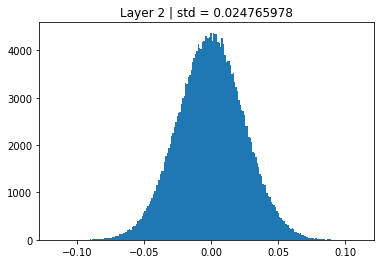

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


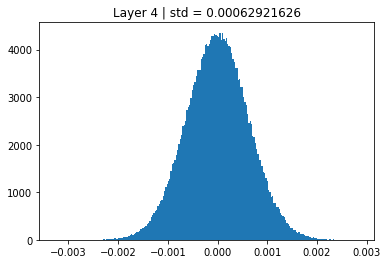

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


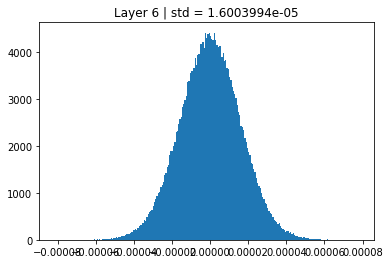

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


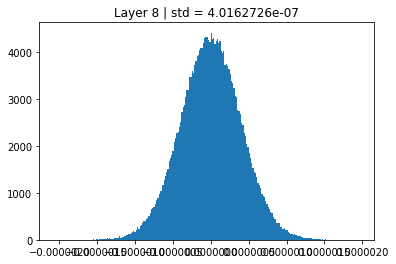

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


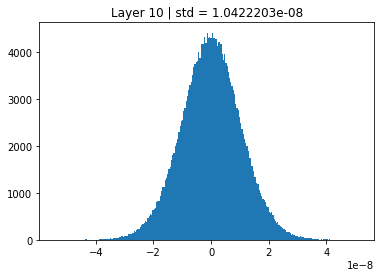

In [32]:
model = fully_connect(init = 0)
model.forward(samples)
x = 1

## Gaussian distribution of mean μ = 0 and std σ = 1 with tanh

Unlike (a), with sigma = 1, the distributions of all layers are very similar. However, (b) is not guassian distrubutions anymore. Also, its standard deviation is too high. Almost all of the distributions of x focused at the edges -1 and 1, while there are almost no outputs in the middle around the mean 0. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


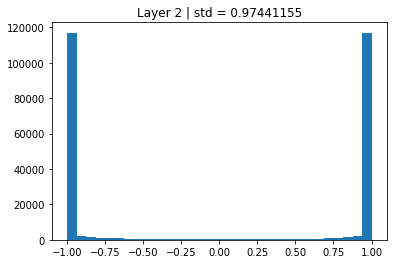

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


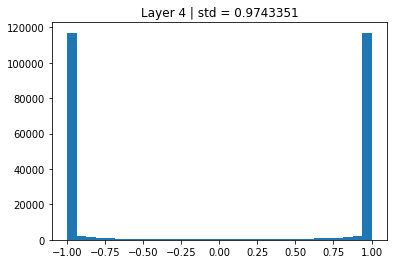

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


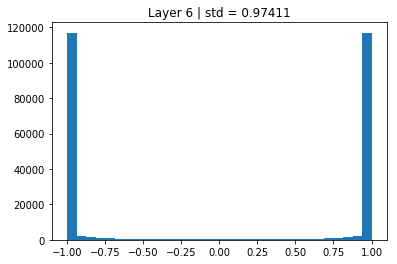

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


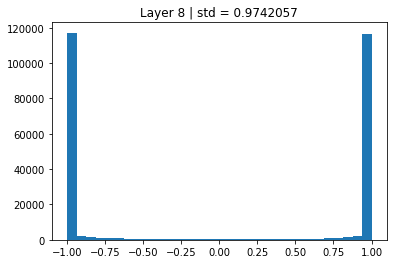

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


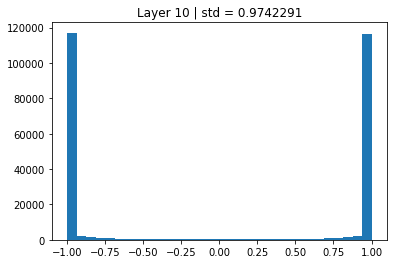

In [33]:
model = fully_connect(init = 1)
model.forward(samples)
x = 1

## Xavier initialization with tanh

Means of (a), (b), (c) are all the same, which is 0. However, layers outputs of (a) has too small standard deviation, while (b) has too high standard deviation. In other words, the outputs of (a) and (b) are too extreme. But, the outputs of (c) has good medium standard deviation which makes the plot more smooth and uniform. From problem 1, we see that during backprobapagation, if the distributions of (c) would makes the update smoother and avoid vanshing gradient. Thus, Xavier initialization is definitely better. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


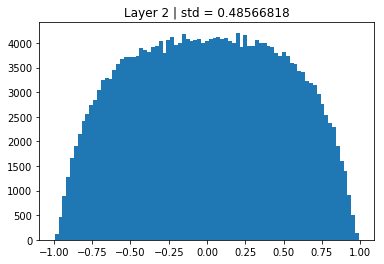

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


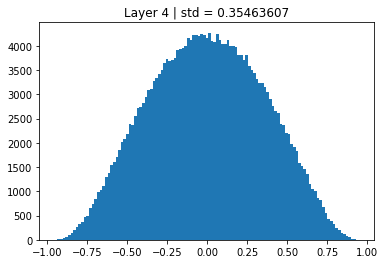

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


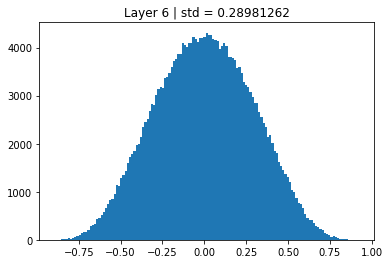

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:100: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


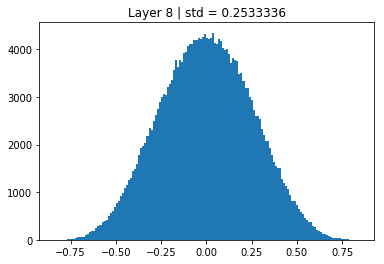

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


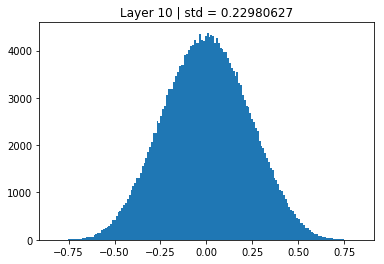

In [37]:
model = fully_connect(init = 2)
model.forward(samples)
x = 1

## Xavier initialization with relu

Since all negatives are mapped to 0, the high value at value 0 in the distribution is expected. However, one thing to notice that with relu, the standard deviation decreases much faster than with tanh. with tanh, the sigma only decreases from 0.48 to 0.23, but with relu, the sigma decreases from 0.43 to 0.028. Thus, as we can see, in this case, Xavier performs better with tanh than relu. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


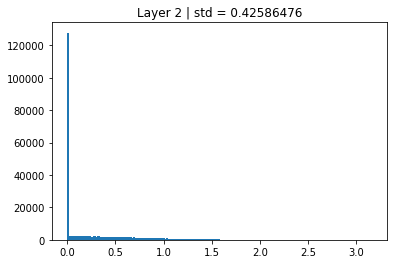

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


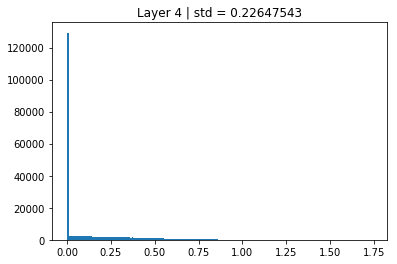

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


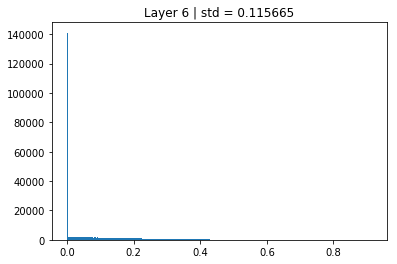

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:100: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


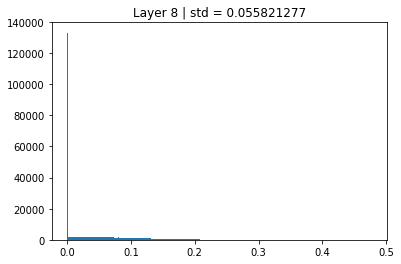

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


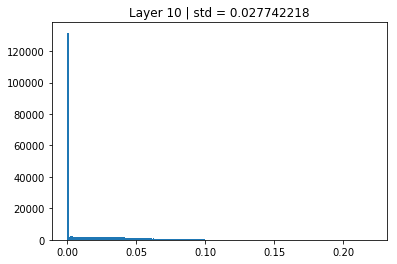

In [40]:
model = fully_connect(init = 2,relu = True)
model.forward(samples)
x = 1

## MSRA initialization with relu

As we can see that with MSRA, the standard deviation is all around 0.8. The sigma stays almost the same throughout the layers. However, in (d), with Xavier decreases dramatically. Thus, the outputs with MSRA tends to be more stable than Xavier. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


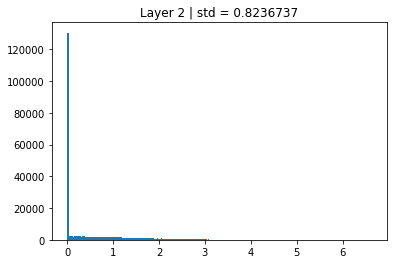

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


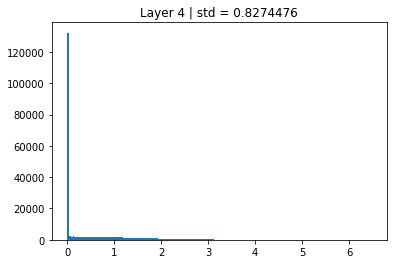

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


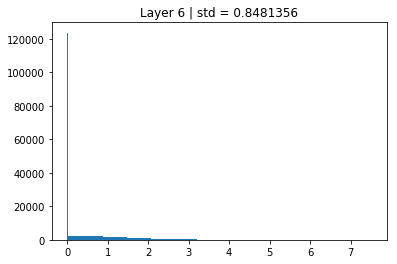

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


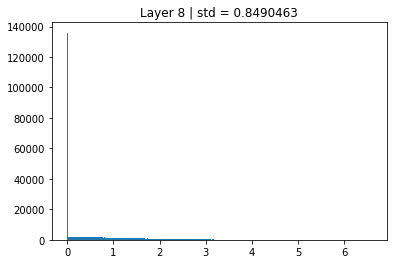

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


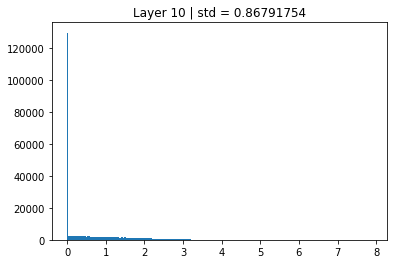

In [42]:
model = fully_connect(init = 3,relu = True)
model.forward(samples)
x = 1